In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('/content/College_Data', index_col=0)
df.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


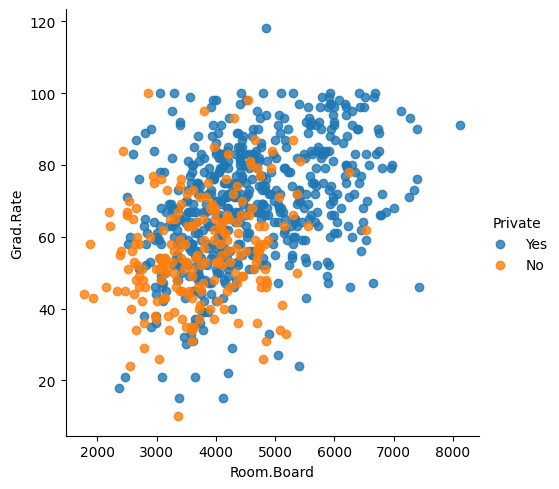

In [3]:
sns.lmplot(x='Room.Board', y='Grad.Rate', data=df, hue='Private', fit_reg=False)

In [4]:
kmean = KMeans(n_clusters=2)
kmean.fit(df.drop('Private', axis=1))
print(kmean.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.51195815e+01]
 [1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]]


In [5]:
def converter(private):
    if private == 'Yes':
        return 1
    else:
        return 0


df['cluster'] = df['Private'].apply(converter)
df.head()
print(confusion_matrix(df['cluster'], kmean.labels_))
print('/n')
print(classification_report(df['cluster'], kmean.labels_))

[[138  74]
 [531  34]]
/n
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

